In [2]:
import pandas as pd
import numpy as np
# 시각화 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
%matplotlib inline

In [3]:
boho_final = pd.read_csv('C:/Users/doong/Desktop/PythonWorkspace/창종설/boho_final(클러스터링_final).csv')

In [4]:
boho_final.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
boho_final.columns

Index(['시설명', '시간대구분', '주소', '시설종류', '구역지정수', 'CCTV 수', '도로표지판 수', '과속방지턱 수',
       '위도', '경도', 'CCTV설치여부', '보호구역도로폭', 'tmp', '속도', '도로명', '행정동', '시군구명',
       '총생활인구수', '사망자수', '중상자수', '경상자수', '부상신고자수', '가해운전자 차종', '피해운전자 차종',
       '피해운전자 연령', '사고 수', '통행량 도로명', '통행량', '면적', '인구밀도', '위험도',
       'cluster_label', '위험도군집', '일출/일몰', '등하교시간', '점심시간', '가해차종엔진125cc이상',
       '피해자어린이유무', '피해자교통수단탑승유무', '보호구역초등학교여부', '활동시간', '1차선이하', '표지판8개이하',
       '방지턱43개이하', '구역지정2개이하', 'CCTV3개이하', '피해자초고령여부', '가해차종4륜유무',
       '피해자연령38세이하', '피해차량승합차량여부', '일방통행여부', '방지턱16개이하', 'CCTV10개이하',
       '초등학교셔틀버스운영여부'],
      dtype='object')

In [6]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score

# 사용할 입력 변수
features = boho_final.columns
X = boho_final[features].drop(["시설명","시간대구분","주소",'시설종류','구역지정수','CCTV 수', '도로표지판 수', '과속방지턱 수',
                               "위도","경도",'보호구역도로폭',"tmp","도로명","행정동","시군구명","총생활인구수","사망자수",
                              "중상자수","경상자수","부상신고자수",'가해운전자 차종','피해운전자 차종','피해운전자 연령',
                               "사고 수","통행량 도로명","통행량",'속도','면적','인구밀도',"위험도","cluster_label",
                              "위험도군집"], axis=1)
y = boho_final["위험도군집"] 
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=240)

from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X_train, y_train = smote.fit_resample(X_train, y_train)

# pipe_rf = make_pipeline(preprocessor,RandomForestClassifier(random_state=240))
# pipe_rf.fit(X_train, y_train)
# y_pred = pipe_rf.predict(X_test)
# print('테스트 정확도: %.3f' % accuracy_score(y_test, y_pred))

In [7]:
rf = RandomForestClassifier(n_estimators=300, max_depth=30,random_state=240)
rf.fit(pd.get_dummies(X_train), y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)
print("테스트 정확도 : %.3f" % accuracy_score(y_test,rf.predict(pd.get_dummies(X_test))))

테스트 정확도 : 0.981


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test) # 예측치
y_true = y_test 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    1     2     1]
 [    3   153    41]
 [    2   157 10512]]
              precision    recall  f1-score   support

        고위험군       0.17      0.25      0.20         4
        저위험군       0.49      0.78      0.60       197
        중위험군       1.00      0.99      0.99     10671

    accuracy                           0.98     10872
   macro avg       0.55      0.67      0.60     10872
weighted avg       0.99      0.98      0.98     10872



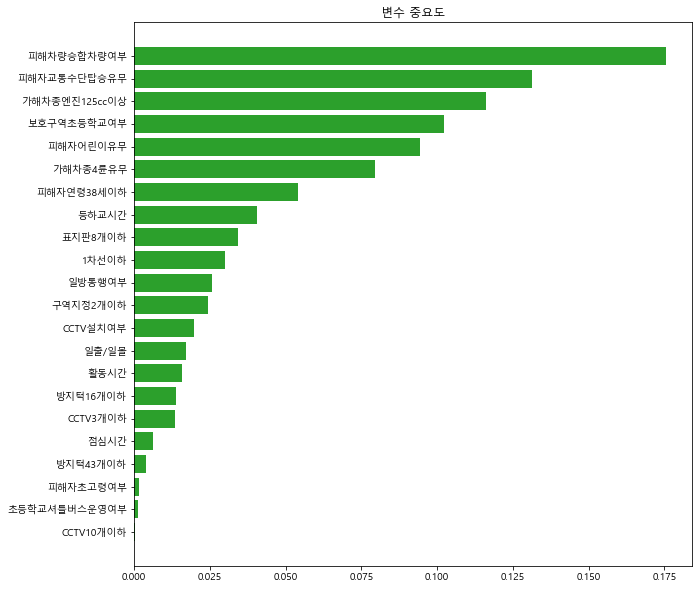

In [9]:
plt.figure(figsize=(10,10))
plt.title('변수 중요도')
plt.barh(range(len(indices)), importances[indices], color='tab:green', align='center')
plt.yticks(range(len(indices)), [pd.get_dummies(X_train).columns[i] for i in indices])
plt.show()

In [114]:
df_predict = pd.read_csv('C:/Users/doong/Desktop/PythonWorkspace/창종설/df_new.csv')    

In [115]:
X_new = df_predict[features].drop(["시설명","시간대구분","주소",'시설종류','구역지정수','CCTV 수', '도로표지판 수', '과속방지턱 수',
                               "위도","경도",'보호구역도로폭',"tmp","도로명","행정동","시군구명","총생활인구수","사망자수",
                              "중상자수","경상자수","부상신고자수",'가해운전자 차종','피해운전자 차종','피해운전자 연령',
                               "사고 수","통행량 도로명","통행량",'속도','면적','인구밀도',"위험도","cluster_label",
                              "위험도군집"], axis=1)

In [116]:
predict = rf.predict(X_new)

In [117]:
X_new["개선 후"] = 0
for i,p in enumerate(predict):
    X_new.loc[i,"개선 후"] = p

In [118]:
X_new["개선 후"].value_counts()

고위험군    6
저위험군    6
Name: 개선 후, dtype: int64

In [119]:
X_new["개선 후"]

0     저위험군
1     저위험군
2     저위험군
3     고위험군
4     고위험군
5     고위험군
6     저위험군
7     고위험군
8     저위험군
9     고위험군
10    고위험군
11    저위험군
Name: 개선 후, dtype: object